In [1]:
# task 1
# Импортируйте библиотеки pandas, numpy и matplotlib.
# Загрузите "Boston House Prices dataset" из встроенных наборов 
# данных библиотеки sklearn.
# Создайте датафреймы X и y из этих данных.
# Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
# с помощью функции train_test_split так, чтобы размер тестовой выборки
# составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
# Масштабируйте данные с помощью StandardScaler.
# Постройте модель TSNE на тренировочный данных с параметрами:
# n_components=2, learning_rate=250, random_state=42.
# Постройте диаграмму рассеяния на этих данных.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets as ds

boston = ds.load_boston()

feature_names = boston['feature_names']

X = pd.DataFrame(boston['data'], columns=feature_names)
y = pd.DataFrame(boston['target'], columns=['price'])
print(y)

     price
0     24.0
1     21.6
2     34.7
3     33.4
4     36.2
..     ...
501   22.4
502   20.6
503   23.9
504   22.0
505   11.9

[506 rows x 1 columns]


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train)

         CRIM    ZN  INDUS  CHAS     NOX     RM   AGE     DIS   RAD    TAX  \
477  15.02340   0.0  18.10   0.0  0.6140  5.304  97.3  2.1007  24.0  666.0   
15    0.62739   0.0   8.14   0.0  0.5380  5.834  56.5  4.4986   4.0  307.0   
332   0.03466  35.0   6.06   0.0  0.4379  6.031  23.3  6.6407   1.0  304.0   
423   7.05042   0.0  18.10   0.0  0.6140  6.103  85.1  2.0218  24.0  666.0   
19    0.72580   0.0   8.14   0.0  0.5380  5.727  69.5  3.7965   4.0  307.0   
..        ...   ...    ...   ...     ...    ...   ...     ...   ...    ...   
106   0.17120   0.0   8.56   0.0  0.5200  5.836  91.9  2.2110   5.0  384.0   
270   0.29916  20.0   6.96   0.0  0.4640  5.856  42.1  4.4290   3.0  223.0   
348   0.01501  80.0   2.01   0.0  0.4350  6.635  29.7  8.3440   4.0  280.0   
435  11.16040   0.0  18.10   0.0  0.7400  6.629  94.6  2.1247  24.0  666.0   
102   0.22876   0.0   8.56   0.0  0.5200  6.405  85.4  2.7147   5.0  384.0   

     PTRATIO       B  LSTAT  
477     20.2  349.48  24.91  
15 

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns = feature_names)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns = feature_names)
X_test_scaled

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.396809,-0.500320,-1.007111,-0.278089,-0.395412,0.141282,0.555916,-0.545853,-0.507797,-0.650926,-0.771951,0.428872,-0.481210
1,-0.400796,1.229499,-0.664391,3.595975,-0.931315,0.623942,-1.275254,0.126565,-0.624360,-0.903989,-0.322703,0.444180,-1.257094
2,-0.395234,-0.500320,2.433163,-0.278089,0.446720,-0.469805,1.081663,-0.911447,-0.624360,1.849573,0.800418,0.369934,0.790338
3,-0.396825,-0.500320,-0.025421,-0.278089,-1.220532,-0.354079,-2.172957,0.694876,-0.624360,-0.596698,0.396095,0.378682,-0.976875
4,0.167084,-0.500320,1.033237,-0.278089,1.331384,-0.026661,0.831307,-0.676503,1.706891,1.578434,0.845343,0.315043,0.677687
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,1.715000,-0.500320,1.033237,-0.278089,0.344643,-2.382098,1.124581,-1.059057,1.706891,1.578434,0.845343,-3.580942,3.085604
98,1.219719,-0.500320,1.033237,-0.278089,1.561057,0.204790,0.884955,-0.848260,1.706891,1.578434,0.845343,-3.595156,0.787522
99,1.177967,-0.500320,1.033237,-0.278089,0.344643,0.481403,1.124581,-1.071460,1.706891,1.578434,0.845343,-3.512491,1.233902
100,-0.401311,-0.500320,-0.943214,-0.278089,-0.914302,-0.424644,-0.838921,0.290806,-0.740922,-0.946166,0.081621,0.434230,0.056698


In [13]:
from sklearn.manifold import TSNE

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

X_train_tsne





array([[ 28.13809   ,  18.375324  ],
       [ -9.785578  ,  -4.5355387 ],
       [-15.695753  , -17.543627  ],
       [ 37.924854  ,  13.517046  ],
       [ -8.786393  ,   3.9951665 ],
       [-13.988173  ,  -7.7626657 ],
       [-11.960751  ,  -7.4771976 ],
       [-18.704308  , -23.812914  ],
       [ 38.665813  ,  12.55771   ],
       [ 35.53426   ,  11.327715  ],
       [-12.056245  ,  -8.116859  ],
       [ -5.7400675 ,  -5.8184624 ],
       [ -2.0275154 ,  -8.284211  ],
       [ 35.76188   ,  12.485169  ],
       [ -2.2966845 , -10.11944   ],
       [-10.227566  ,   7.138571  ],
       [ -7.261146  ,   1.1323055 ],
       [-14.401978  , -18.217144  ],
       [-13.338248  , -12.094605  ],
       [-17.165924  , -12.843067  ],
       [ 34.02783   ,  17.060034  ],
       [ -4.4231987 ,   0.22272195],
       [-15.497815  ,  -7.9093003 ],
       [-10.733389  ,  -5.5205164 ],
       [-18.339699  , -23.839216  ],
       [ -3.087924  ,  -8.492775  ],
       [  8.2998    ,   2.3935862 ],
 

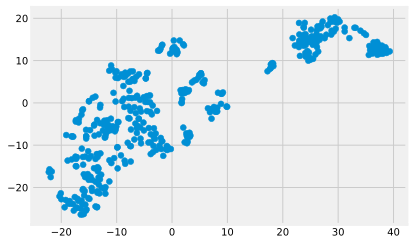

In [14]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])